Epoch 1/10
1407/1407 [==============================] - 81s 56ms/step - loss: 1.5238 - accuracy: 0.4463 - val_loss: 1.2153 - val_accuracy: 0.5728
Epoch 2/10
1407/1407 [==============================] - 79s 56ms/step - loss: 1.1701 - accuracy: 0.5870 - val_loss: 1.0623 - val_accuracy: 0.6328
Epoch 3/10
1407/1407 [==============================] - 78s 56ms/step - loss: 1.0193 - accuracy: 0.6418 - val_loss: 0.9737 - val_accuracy: 0.6686
Epoch 4/10
1407/1407 [==============================] - 77s 55ms/step - loss: 0.9208 - accuracy: 0.6752 - val_loss: 0.9431 - val_accuracy: 0.6704
Epoch 5/10
1407/1407 [==============================] - 76s 54ms/step - loss: 0.8474 - accuracy: 0.7012 - val_loss: 0.9008 - val_accuracy: 0.6906
Epoch 6/10
1407/1407 [==============================] - 78s 55ms/step - loss: 0.7877 - accuracy: 0.7240 - val_loss: 0.8861 - val_accuracy: 0.6952
Epoch 7/10
1407/1407 [==============================] - 78s 55ms/step - loss: 0.7323 - accuracy: 0.7417 - val_loss: 0.8971 -

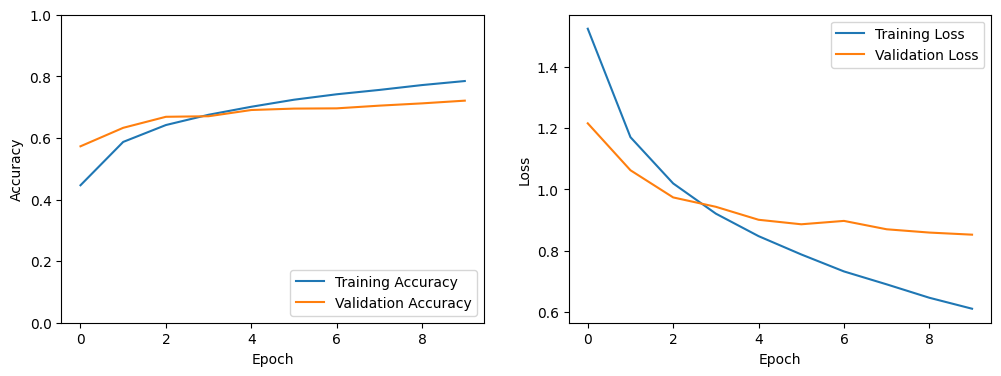

313/313 - 4s - loss: 0.8708 - accuracy: 0.7092 - 4s/epoch - 14ms/step

Test accuracy: 70.92%
313/313 [==============================] - 5s 15ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.77      0.72      0.74      1000
  automobile       0.86      0.83      0.84      1000
        bird       0.66      0.55      0.60      1000
         cat       0.56      0.49      0.52      1000
        deer       0.56      0.75      0.64      1000
         dog       0.62      0.59      0.60      1000
        frog       0.76      0.80      0.78      1000
       horse       0.73      0.77      0.75      1000
        ship       0.80      0.81      0.81      1000
       truck       0.79      0.79      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



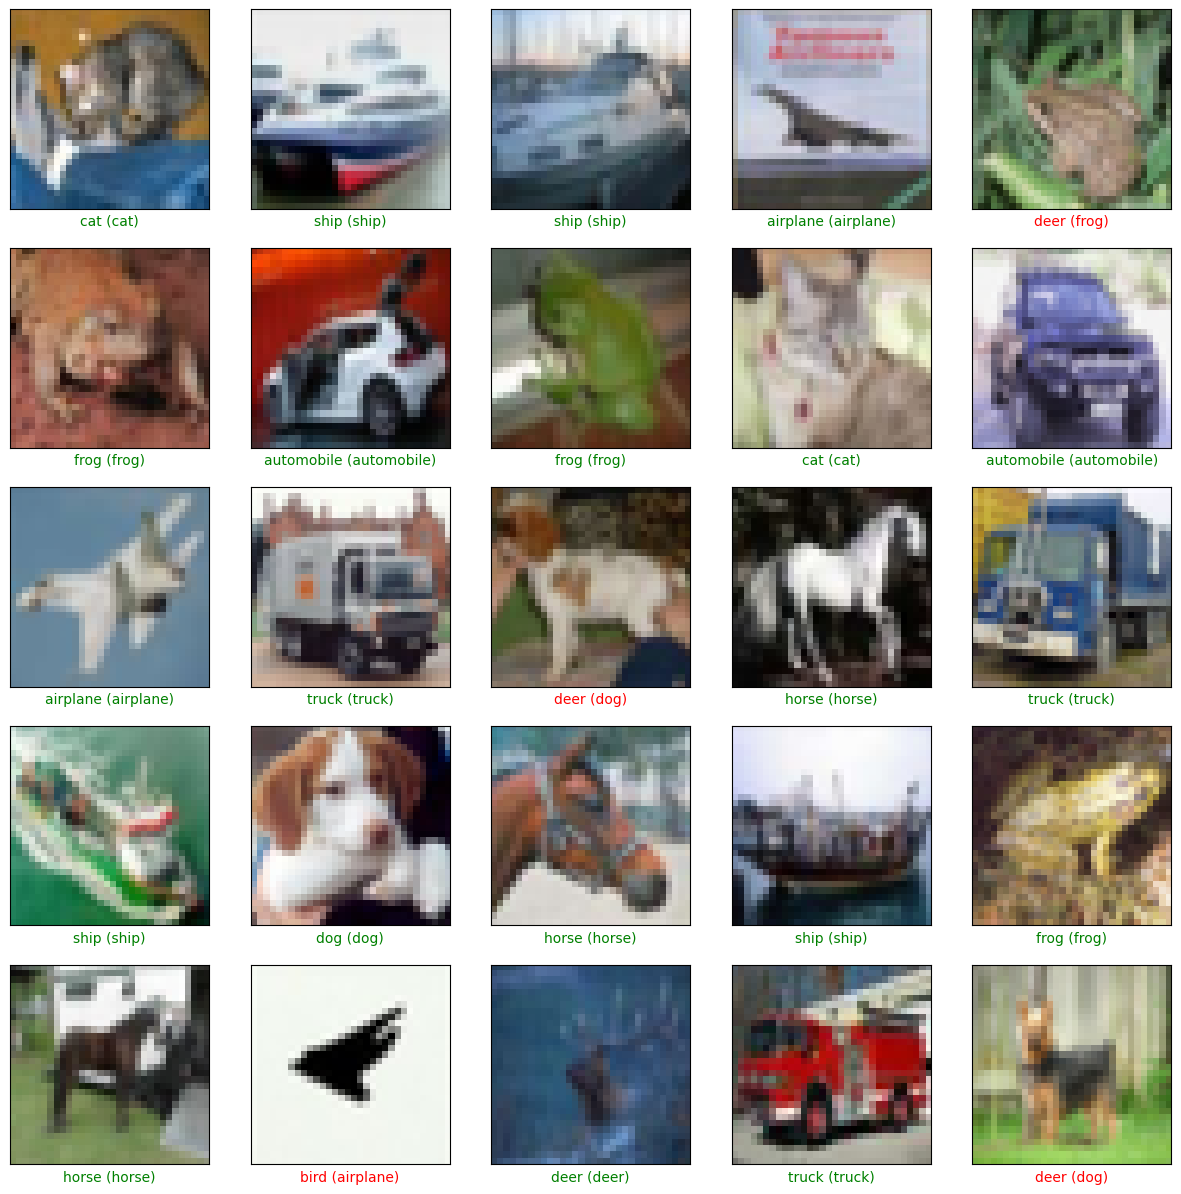

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Load and prepare dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Split training data for validation
val_images = train_images[:5000]
val_labels = train_labels[:5000]
partial_train_images = train_images[5000:]
partial_train_labels = train_labels[5000:]

# Train the model
history = model.fit(partial_train_images, partial_train_labels,
                    epochs=10,
                    validation_data=(val_images, val_labels))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

# Generate predictions
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# Visualize predictions
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    true_label = class_names[test_labels[i][0]]
    predicted_label = class_names[predicted_labels[i]]

    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()